## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data from remote link

In [2]:
path= "http://bit.ly/w-data"
data= pd.read_csv(path)
data.head(10) #top 10 entries

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info() #information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Ploting a 2-D graph to visualize the dataset and  find if there is any relationship between the data

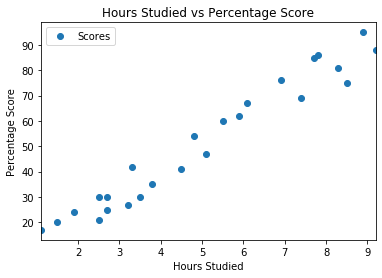

In [5]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours Studied vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Plotting the regression line

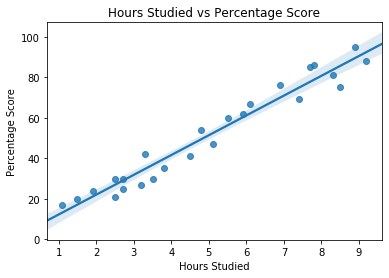

In [6]:
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Hours Studied vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

the graphs above show that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

In [7]:
X= data[['Hours']].values
y=data[['Scores']].values

#### Spliting the dataset into training and testing data

In [8]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

## Training the model using Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(Xtrain, ytrain) 

print("Training complete.")

Training complete.


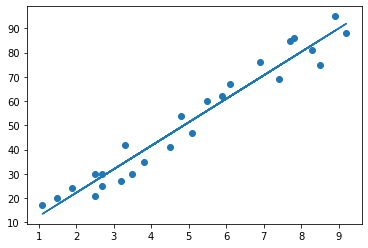

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

In [11]:
print('Training score: ',regressor.score(Xtrain, ytrain))
print('Test score: ',regressor.score(Xtest, ytest))

Training score:  0.9491209376364417
Test score:  0.9678055545167994


In [12]:
ypred = regressor.predict(Xtest) # Predicting the scores

In [13]:
# Comparing Actual vs Predicted
ytest

array([[81],
       [30],
       [21],
       [76],
       [62]], dtype=int64)

In [14]:
ypred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [15]:
# We can also test with your own data
print("No of Hours = ",9.25)
print("Predicted Score = ",regressor.predict([[9.25]])[0][0])

No of Hours =  9.25
Predicted Score =  92.38611528261494


## Evaluating the model

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(ytest, ypred))

Mean Absolute Error: 3.9207511902099244
